F ratio: 91.99698
P-value =  1.1102230246251565e-16


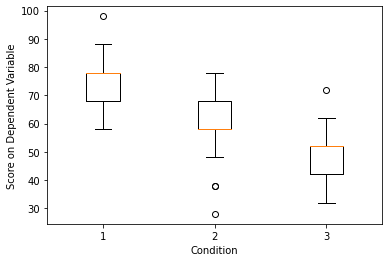

Eta Squared =  0.6524748138414355

Checking the result with statsmodels:


,F Value,Num DF,Den DF,Pr > F
condition,91.9970,2.0000,98.0000,0.0000


In [1]:
# one factor dependent samples ANOVA

import statistics as stats
import scipy
import scipy.stats
import random
import numpy as np
import matplotlib.pyplot as plt

# generating sample data

sample1 = []
sample2 = []
sample3 = []

random_means = np.random.choice(np.arange(50, 80), size = 3)

for i in range(50):
    sample1.append(10* round(np.random.randn()) + random_means[0])
    sample2.append(10* round(np.random.randn()) + random_means[1])
    sample3.append(10* round(np.random.randn()) + random_means[2])
    
# calculating the df

k = 3

if len(sample1) == len(sample2) and len(sample2) == len(sample3):
    n = len(sample1)
    
N = len(sample1) + len(sample2) + len(sample3)
df_total = N-1
df_within_treatments = N - k
df_between_treatments = k-1
df_between_subjects = n-1
df_error = df_within_treatments - df_between_subjects

# calculating the total sum of squares

x_sq = []

for i in sample1:
    x_sq.append(i**2)
  
    

for i in sample2:
    x_sq.append(i**2)

    

for i in sample3:
    x_sq.append(i**2)
   
    
sum_x_sq = sum(x_sq)

G = sum(sample1) + sum(sample2) + sum(sample3)

SS_total = sum_x_sq - G**2/N

# calculating the between treatments sum of squares

total_sample1 = sum(sample1)
total_sample2 = sum(sample2)
total_sample3 = sum(sample3)

SS_between_treatments = (((total_sample1**2/len(sample1)) + (total_sample2**2/len(sample2)) + (total_sample3**2/len(sample3))) - G**2/N)

# calculating the within treatments sum of squares

sqs_sample1 = []


for i in sample1:
    sqs_sample1.append(i**2)


SS_sample1 = sum(sqs_sample1) - sum(sample1)**2/len(sample1)

sqs_sample2 = []


for i in sample2:
    sqs_sample2.append(i**2)
    

SS_sample2 = sum(sqs_sample2) - sum(sample2)**2/len(sample2)

sqs_sample3 = []


for i in sample3:
    sqs_sample3.append(i**2)
    

SS_sample3 = sum(sqs_sample3) - sum(sample3)**2/len(sample3)

SS_within_treatments = SS_sample1 + SS_sample2 + SS_sample3

# calculating the between subjects sum of squares

P_sq = []


for i in np.arange(len(sample1)):
    P_sq.append(sample1[i] + sample2[i] + sample3[i])
    P_sq[i] = P_sq[i]**2/k

    
sum_P_sq_over_k = sum(P_sq)

SS_between_subjects = sum_P_sq_over_k - G**2/N

# calculating the error variance

SS_error = SS_within_treatments - SS_between_subjects
df_error = df_within_treatments - df_between_subjects

s_sq_error = SS_error/df_error

# calculating the between treatments variance

s_sq_between_treatments = SS_between_treatments/df_between_treatments

# calculating the F ratio

F_ratio = s_sq_between_treatments/s_sq_error


print('F ratio:', round(F_ratio,5))
print('P-value = ',  1 - scipy.stats.f.cdf(F_ratio, dfn = df_between_treatments, dfd = df_error))


    
# plotting a boxplot of the data

plt.boxplot([sample1,sample2,sample3])
plt.xlabel('Condition')
plt.ylabel('Score on Dependent Variable')
plt.show()

# calculating effect size

eta_squared = SS_between_treatments/(SS_between_treatments + SS_error)

print('Eta Squared = ', eta_squared)

from statsmodels.stats.anova import AnovaRM
import pandas as pd

print('\nChecking the result with statsmodels:')
all_samples = np.append(sample1, [sample2, sample3])

participant_id = np.arange(len(sample1))
participant_id = np.append(participant_id, np.arange(len(sample1)))
participant_id = np.append(participant_id, np.arange(len(sample1)))

labels = np.repeat('condition_1', len(sample1))
labels = np.append(labels, np.repeat('condition_2', len(sample2)))
labels = np.append(labels, np.repeat('condition_3', len(sample3)))

data = pd.DataFrame({'score': all_samples, 'condition': labels, 'participant_id': participant_id})

result = AnovaRM(data = data, depvar = 'score', subject = 'participant_id', within = ['condition']).fit()
result.summary()